# Project: Investigate a Data Set- No-Show-Appointments Data

 ### Introduction
 
In this project, I will be analyzing data associated with medical appointments and in particular, I will be interested in finding trends among patients who show up and patients who do not show up for their appointments.

These following questions will be answered:

- What is the percentage of patients that show up for their appointments and the patients that do not show up for their appointment?
- Which gender shows up more for appointment?
- What is the age group of patients that show up more for appointments?

Bar chart and Pie chart will be used for the visualization of our data during this analysis.

This **no-show-apppointment** dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient which will serve as our metrics are included in each column of the dataset.



In [266]:
# import libraries needed for this data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
sns.set_style('darkgrid')
%matplotlib inline          

**Data Wrangling and Data Cleaning**

**Data Wrangling** - This is where we'll be inspecting the data to understand the structure and figure out any changes I have to make.

In [275]:
# load the data into pandas dataframe

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [276]:
# view the first five rows of the dataset

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [277]:
# view the last 5 rows of the datas

df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775120e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [278]:
# view 5 random rows

df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6729,9.542960e+14,5679600,F,2016-05-10T10:08:42Z,2016-05-16T00:00:00Z,32,JESUS DE NAZARETH,0,0,0,0,0,0,No
37516,6.793580e+13,5634524,F,2016-04-28T11:06:57Z,2016-05-06T00:00:00Z,55,CARATOÍRA,0,1,0,0,0,0,No
61247,4.235650e+11,5541736,F,2016-04-05T08:17:17Z,2016-05-10T00:00:00Z,53,DO QUADRO,0,0,0,0,0,1,No
39939,6.189470e+12,5699081,M,2016-05-16T08:09:01Z,2016-05-16T00:00:00Z,3,RESISTÊNCIA,0,0,0,0,0,0,No
48727,8.396530e+13,5699284,M,2016-05-16T08:21:56Z,2016-05-16T00:00:00Z,2,JARDIM DA PENHA,0,0,0,0,0,0,No


In [280]:
# view the number of rows and columns in the dataset

df.shape 

(110527, 14)

*The result above shows this dataset has 110527 rows (also known as samples and here, it is the number of observation of patients) and 14 columns, which are the different features*

In [282]:
# view the missing values in the dataset

df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


*This output returns True, if any value is missing and False, if no value is missing. Apparantly, beacuse this is a large dataset, we can't view the entire dataset to see if there is any missing value which returns True. So, what we do is to check for the sum of the missing values if there is any. This is done in the code below.*

In [283]:
# view the number of missing values in the dataset

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*The output above returns 0, which tells us there is no data missing*

In [284]:
# view the number of unique values for each column

df.nunique() 

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

*The output above returns the number of unique/distinct observations or labels for each column. For example, in this dataset, Gender has 2 unique labels (M and F), No-show has 2 unique labels (Yes and No).*

In [286]:
# check if there is any duplicated row

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

*The output should return a series with True and False values that describes which rows in the dataframe are duplicated and not duplicated. Apparantly, beacuse this is a large dataset, we can't view the entire dataset to see if there is any duplicated row which returns True, so, what we do is to check for the sum of duplicated rows if there is any. This is done in the code below.*

In [107]:
# check the number of duplicated rows

df.duplicated().sum()

0

*The output above returns 0, which tells us there is no duplicated row*

**Data Cleaning** - I will be looking out for incorrect data types, missing data, duplicates, structural problems (such as different column names), inconsistency in writing column names(such as lowercase, uppercase, camelcase, underscores or hypen), mismatch number of records.

In [288]:
# view information of the data in the dataframe

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*The output above shows us the total number of entries(which is 110527), 14 columns(which are the features of patients), the non-null values(to show if values are not missing) and the datatype of each columns(which are float, integers and objects).*

*Note that, strings are displayed as objects in the datatype because the length of string is not fixed and Pandas uses an object ndarray which saves pointers to objects.*

*In this dataset, the following were observed:*
 - *there is no missing value*
 - *the datatype of the patientId is float instead of integer*
 - *the Gender and No-show are object. Since their unique labels are 2, the datatype should be a category which is a finite list of text values*
 - *the datatype of the scheduledDay and appointmentDay are objects(strings) instead of datetime*
 - *there is an incorrect spelling of Hipertension and Handcap which should be Hypertension and Handicap respectively*
 - *the column names are not uniformly written. They should all be either lowercase, camelcase, underscore. Just a uniform way of    writing for better reading.*
 


Now, let's clean the dataset. 

Convert the above mentioned datatypes to its appropraite datatypes with the **Function codes** below.

In [289]:
obj_cat = ['Gender', 'No-show']

for i in obj_cat:
    df[i] = df[i].astype('category')
    
df['PatientId'] = df['PatientId'].astype('int')

date = ['ScheduledDay', 'AppointmentDay']
for i in date:
    df[i] = pd.to_datetime(df[i])    

In [290]:
# view information of the data in the dataframe to see if the above mentioned datatypes have been succesfully converted to its appropraite datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

*Now, from the above output, we see that the datatypes have been converted appropriately as we now have PatientId to be int, Gender and No-show to be category, ScheduledDay and AppointmentDay to be datetime*

Rename the incorrect column names following spellings and uniformity of camelcase.

In [291]:
# Rename column names

df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap', 'SMS_received':'SMSReceived', 'No-show':'NoShow'}, inplace=True)

In [293]:
# check if the column names have been successfully renamed

df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


*The output shows that the column names have been successfully renamed*.

The output also shows that PatientId has a negative value which shouldn't be, so let's clean the data some more by dropping the minimum PatientId values, thereby eliminating the negative ones.

In [294]:
# drop the negative PatientId values

df.drop(df[df['PatientId'] == df['PatientId'].min()].index, inplace=True)


In [295]:
# check to see if the negative value has been successfully dropped.

df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
117,744463183,5539219,F,2016-04-01 14:27:30+00:00,2016-04-29 00:00:00+00:00,34,SANTO ANTÔNIO,1,0,0,0,0,1,No


*This dataset had been further cleaned and its output shows us that the PatientId column do not contain negative values anymore.*

In [296]:
# view the description of data in the dataframe

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,2.590000e+02,2.590000e+02,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,9.133448e+08,5.675310e+06,39.312741,0.092664,0.212355,0.084942,0.034749,0.007722,0.308880
std,6.044124e+08,6.618118e+04,24.529500,0.290523,0.409767,0.279335,0.183498,0.087704,0.462926
min,3.920000e+04,5.367781e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.197673e+08,5.638730e+06,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.456162e+08,5.678418e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.435465e+09,5.727685e+06,59.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.786987e+06,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*The above output shows us the descriptive statistics of this data which includes the count, central tendency and dispersion. For example, this output tells us that the mean age of patients is 39*

Now, we have a dataset that is clean

### Exploratory Data Analysis - Here, we explore the data using graphs or through some python functions, then summarize the key insights

**Research Question 1:** What is the percentage of patients that show up for their appointments and the patients that do not show up for their appointment?

In [297]:
# view the count of unique labels in the NoShow pandas dataframe.

appointment_percent = df['NoShow'].value_counts()
appointment_percent

No     214
Yes     45
Name: NoShow, dtype: int64

*This output shows us that 214 patients showed up for their appointment and 45 patients did not show up for their appointments.*

*Note that the NoShow column says ‘No’ if the patients showed up to their appointment, and ‘Yes’ if they did not show up*.

Now, let's visualize the percentage of these patients' distribution that show and did not show up for their appointments withe codes below.

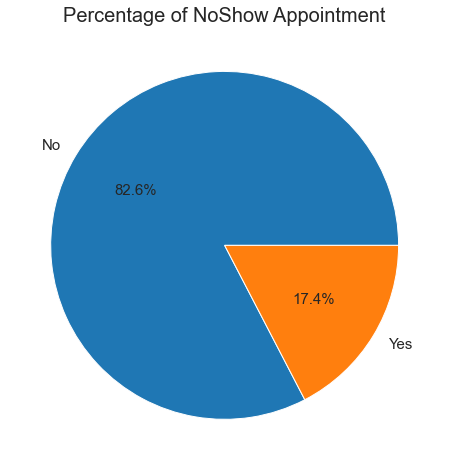

In [299]:
# plot a pie chart

plt.figure(figsize=(16, 8))
label = ['No', 'Yes']
plt.pie(appointment_percent, labels=label, autopct='%1.1f%%', textprops={'fontsize' : 15})
plt.title('Percentage of NoShow Appointment', fontsize=20)
plt.show()

From the above pie chart, more than 2/3 of the patients show up for their appointments. We can see that 82.6% of patients showed up for their appointments while 17.4% of patients did not show up for their appointment. 

**Research Question 2** - Which gender shows up more for appointment?

In [302]:
# Group the genders based on NoShow

gender_df = df.groupby('Gender')['NoShow'].value_counts()
gender_df

Gender     
F       No     132
        Yes     29
M       No      82
        Yes     16
Name: NoShow, dtype: int64

*This output tells us the following*:

- *132 female patients showed up for their appointment*.
- *29 female patients did not show up for their appointments.*
- *82 female patients showed up for their appointment*
- *16 female patients did not show up for their appointments.*

Now, let's visualize the gender that show up more for their appointments with the codes below.

Text(0, 0.5, 'NoShow')

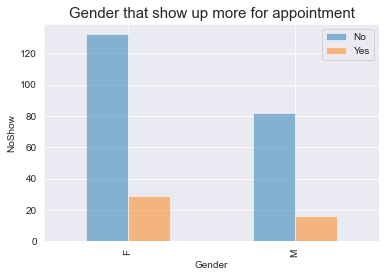

In [303]:
# plot a bar chart

gender_df.unstack(level=1).plot(kind='bar', alpha=0.5)
plt.title('Gender that show up more for appointment', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('NoShow')

*From this bar chart, we can see that female patients show up more for their appointments than the male patients.*

Note that 'F' denotes Female while 'M' denotes Male.

**Research Question 3** - What is the age group of patients that show up more for appointments?

In [349]:
# create a new column for age groups using 'cut' to segment and sort data values into bins.

df['AgeGroup'] = pd.cut(df['Age'], 4)


In [350]:
# view if the new column has been successfully created
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AgeGroup,AgeGroups
463,522886422,5633872,F,2016-04-28 09:58:32+00:00,2016-04-29 00:00:00+00:00,66,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,"(57.968, 66.0]",Elderly
1547,1787165631,5615631,F,2016-04-25 12:47:20+00:00,2016-04-29 00:00:00+00:00,61,TABUAZEIRO,0,0,0,0,0,1,No,"(57.968, 66.0]",Elderly
11288,555199469,5743075,F,2016-05-30 08:39:58+00:00,2016-05-30 00:00:00+00:00,74,JUCUTUQUARA,0,0,0,0,0,0,No,"(66.0, 74.0]",Old
11494,1516446987,5590168,M,2016-04-15 13:44:43+00:00,2016-05-18 00:00:00+00:00,76,ILHA DE SANTA MARIA,0,0,0,0,0,0,No,"(74.0, 82.0]",Old
16272,251541539,5692489,F,2016-05-12 15:29:02+00:00,2016-05-19 00:00:00+00:00,85,MARUÍPE,0,1,0,0,0,0,No,"(82.0, 90.0]",Old


*From this output, it shows that some of the AgeGroup have negative values which should not be, so I would drop the age groups that have negetaive values.*

In [351]:
# drop the negative age group values

df.drop(df[df['AgeGroup'] == df['AgeGroup'].min()].index, inplace=True)

In [354]:
# check if the negative values have been dropped

df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AgeGroup,AgeGroups
47838,251541539,5618607,F,2016-04-26 07:17:39+00:00,2016-05-13 00:00:00+00:00,85,MARUÍPE,0,1,0,0,0,0,Yes,"(82.0, 90.0]",Old
88171,1976945626,5729175,F,2016-05-24 07:17:14+00:00,2016-06-01 00:00:00+00:00,78,ILHA DO PRÍNCIPE,0,0,1,0,0,1,No,"(74.0, 82.0]",Old
28283,911263699,5602267,F,2016-04-19 14:37:48+00:00,2016-05-19 00:00:00+00:00,82,JARDIM CAMBURI,0,0,0,0,0,0,Yes,"(74.0, 82.0]",Old
51557,724118924,5641131,M,2016-04-29 12:32:52+00:00,2016-05-05 00:00:00+00:00,80,PIEDADE,0,1,0,1,0,0,No,"(74.0, 82.0]",Old
108510,251541539,5721140,F,2016-05-19 15:31:13+00:00,2016-06-01 00:00:00+00:00,85,MARUÍPE,0,1,0,0,0,0,No,"(82.0, 90.0]",Old
51459,724118924,5680061,M,2016-05-10 11:01:46+00:00,2016-05-10 00:00:00+00:00,80,PIEDADE,0,1,0,1,0,0,No,"(74.0, 82.0]",Old
101960,355744126,5745118,M,2016-05-30 11:17:40+00:00,2016-06-01 00:00:00+00:00,81,TABUAZEIRO,0,0,0,0,0,0,No,"(74.0, 82.0]",Old
63518,264963387,5736655,F,2016-05-25 08:37:45+00:00,2016-05-25 00:00:00+00:00,80,DA PENHA,0,1,1,0,0,0,No,"(74.0, 82.0]",Old
51455,724118924,5680047,M,2016-05-10 11:00:36+00:00,2016-05-10 00:00:00+00:00,80,PIEDADE,0,1,0,1,0,0,No,"(74.0, 82.0]",Old
51017,724118924,5678767,M,2016-05-10 09:01:26+00:00,2016-05-10 00:00:00+00:00,80,PIEDADE,0,1,0,1,0,0,No,"(74.0, 82.0]",Old


*The ouput shows this dataset no longer have any negative age group values.*

In [355]:
# sort the data values into bins

df['AgeGroup'] = pd.cut(df['Age'], [0,14,19,25,40,50,70,100], labels=['Adolescence', 'Teenager', 'Young Adult', 'Matured', 'Middle Age', 'Elderly', 'Old'])

In [359]:
# count the agegroups

df.groupby(['AgeGroup']).count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,AgeGroups
AgeGroup,,,,,,,,,,,,,,,
Adolescence,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Teenager,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Young Adult,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Matured,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Middle Age,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Elderly,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Old,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


Text(0, 0.5, 'NoShow')

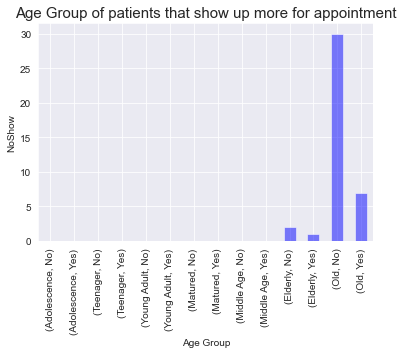

In [362]:
# plot a bar graph to visualize the age group of patients that show up or not fro appointmnets

df.groupby('AgeGroups')['NoShow'].value_counts().plot(kind='bar', alpha=0.5, color='blue')
plt.title('Age Group of patients that show up more for appointment', fontsize=15)
plt.xlabel('Age Group')
plt.ylabel('NoShow')

*From this bar chart, we can see that patients in the age range, 70-100 that are old show up most for their appointments.*

In [361]:
# save the new dataset

df.to_csv('NoShowAppointment_edited.csv', index=False)

### Conclusion 

This data analysis was set out to investigate the trends among patients who show up and patients who do not show up for their appointments. The independent variable were Age, AgeGroups and Gender with NoShow being the dependent variable.

The findings from this investigation showed generally that women show up more for their appointments. It showed that 82.6% of women show up more for their appointment.

The investigation found that most patients that show up for appointments are old in the age range of 70-100.

#### Limitation

There were substantial negative values for PatientId and Age in the dataframe which had to be dropped, thereby, reducing the number of samples to be analyzed. Gathering more dat to replace the negative values would be more appropriate and this may result in different outcomes.

Also, inorder for us to predict if a patient will show up for their scheduled appointment or not, more details are needed on the dataset and more analysis need to be done.

#### Reference - Stack Overflow
